## Clickbait Classification using Machine Learning

Clickbait: The content whose main purpose to attract attention and encourage visitors to click on a link to particular web page.

Cover Points:
1. The problem is binary classification wheather the text data is clickbait or not
2. The clickbait composed of 32000 records with 50:50 rate of both class of data.
3. In this dataset 1 represent its clickbait and 0 represent its not clickbait

Dataset Link: https://www.kaggle.com/amananandrai/clickbait-dataset

Procedure:
1. Data is uploaded on Google Drive.
2. Data is viewed in dataframe using pandas dataframe.
3. Data Preprocessing: Data processing is important in terms of textual data or unstructured data. Data Preprocessing or Cleaning is process of remmoving unneccessary symbols, articles from text to make it easy for machine learning model make better predicitions.
4. The stopwords, digits, nonalphanumerics, data fall under noise for Machine Learning estimators
5. Tokenization
6. Stemming 
7. Lemmatization
8. Stopwords are removed
9. Tokens are converted into vectors via Tfidf over Count Vectorizer
10. Model is trained on Data after its lemmatized and stop words are removed.
11. 4 Machine Learning Estimators/ Models are used 

  a. Logistic Regression
  b. Random Forest Classifier
  c. Support Vector Machine
  d. Navie Bayes

12. Evaluation Metrics used.

  a. Accurracy Score
  b. Classification Report 
  c. Confusion Matrix

13. Accuracy is markdown at the end of notebook.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Library for View Images in Google Colab
from IPython.display import Image
#Library for Data Preprocessing Analysing Visualizing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Library for Text Data Preprocessing 
import nltk
import re
import string
# Library for Splitting Data into Training and Testing
from sklearn.model_selection import train_test_split
# Library for converting text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
# Library for Machine Learning Models/ Estimators
# Logisitic Regression
from sklearn.linear_model import LogisticRegression
# Support Vector Machine
from sklearn import svm
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Library for Machine Learning Models/ Estimators Evaluation Pattern
from sklearn.metrics import classification_report, confusion_matrix

### What is Clickbait???

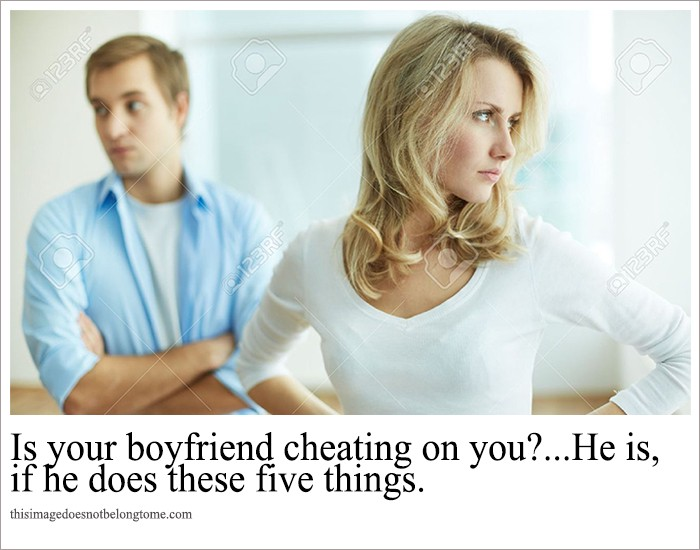

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/First.jpeg',width=400, height=400)

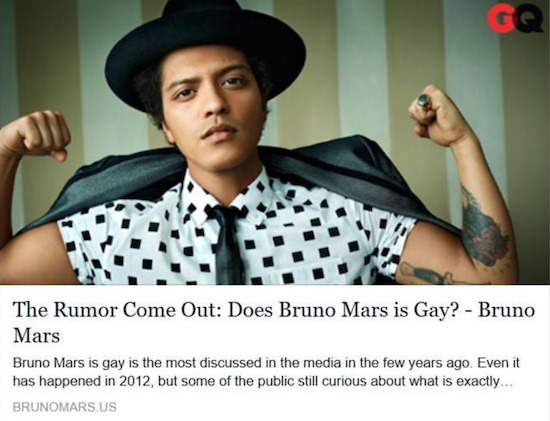

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/Second.png',width=400, height=400)

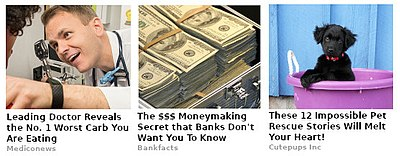

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/Three.jpg',width=600, height=400)

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/clickbait_data.csv")

In [ ]:
data.head()

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [ ]:
data['clickbait'].value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

### Data Preprocessing

In [ ]:
# Writing Function to remove the mentions  URL's  and String with @
def removeURL(text):
    tweet_out = re.sub(r'@[A-Za-z0-9]+','',str(text))
    re.sub('https?://[A-zA-z0-9]+','',str(text))
    return tweet_out

# Writing function to remove the non-numeric characters
def removeNonAlphanumeric(text):
    text_out = "".join([char for char in text if char not in string.punctuation])
    return text_out

In [ ]:
data["NoURL"] = data["headline"].apply(lambda x:removeURL(x))
data["NoPun"] = data["headline"].apply(lambda x:removeNonAlphanumeric(x))

In [ ]:
  data.head()

,headline,clickbait,NoURL,NoPun
0,Should I Get Bings,1,Should I Get Bings,Should I Get Bings
1,Which TV Female Friend Group Do You Belong In,1,Which TV Female Friend Group Do You Belong In,Which TV Female Friend Group Do You Belong In
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,"The New ""Star Wars: The Force Awakens"" Trailer...",The New Star Wars The Force Awakens Trailer Is...
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,"This Vine Of New York On ""Celebrity Big Brothe...",This Vine Of New York On Celebrity Big Brother...
4,A Couple Did A Stunning Photo Shoot With Their...,1,A Couple Did A Stunning Photo Shoot With Their...,A Couple Did A Stunning Photo Shoot With Their...


#### Tokenization

In [ ]:
def tokenization(text):
    token = re.split("\W+",text)
    return token

data['Tokens'] = data['NoPun'].apply(lambda x:tokenization(x))

In [ ]:
data.head(10)

,headline,clickbait,NoURL,NoPun,Tokens
0,Should I Get Bings,1,Should I Get Bings,Should I Get Bings,"[Should, I, Get, Bings]"
1,Which TV Female Friend Group Do You Belong In,1,Which TV Female Friend Group Do You Belong In,Which TV Female Friend Group Do You Belong In,"[Which, TV, Female, Friend, Group, Do, You, Be..."
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,"The New ""Star Wars: The Force Awakens"" Trailer...",The New Star Wars The Force Awakens Trailer Is...,"[The, New, Star, Wars, The, Force, Awakens, Tr..."
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,"This Vine Of New York On ""Celebrity Big Brothe...",This Vine Of New York On Celebrity Big Brother...,"[This, Vine, Of, New, York, On, Celebrity, Big..."
4,A Couple Did A Stunning Photo Shoot With Their...,1,A Couple Did A Stunning Photo Shoot With Their...,A Couple Did A Stunning Photo Shoot With Their...,"[A, Couple, Did, A, Stunning, Photo, Shoot, Wi..."
5,How To Flirt With Queer Girls Without Making A...,1,How To Flirt With Queer Girls Without Making A...,How To Flirt With Queer Girls Without Making A...,"[How, To, Flirt, With, Queer, Girls, Without, ..."
6,32 Cute Things To Distract From Your Awkward T...,1,32 Cute Things To Distract From Your Awkward T...,32 Cute Things To Distract From Your Awkward T...,"[32, Cute, Things, To, Distract, From, Your, A..."
7,If Disney Princesses Were From Florida,1,If Disney Princesses Were From Florida,If Disney Princesses Were From Florida,"[If, Disney, Princesses, Were, From, Florida]"
8,What's A Quote Or Lyric That Best Describes Yo...,1,What's A Quote Or Lyric That Best Describes Yo...,Whats A Quote Or Lyric That Best Describes You...,"[Whats, A, Quote, Or, Lyric, That, Best, Descr..."
9,Natalie Dormer And Sam Claflin Play A Game To ...,1,Natalie Dormer And Sam Claflin Play A Game To ...,Natalie Dormer And Sam Claflin Play A Game To ...,"[Natalie, Dormer, And, Sam, Claflin, Play, A, ..."


#### Stemming

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    out_text = [ps.stem(word) for word in text]
    return out_text

data['Stem'] = data['Tokens'].apply(lambda x:stemming(x))

In [ ]:
data.head()

,headline,clickbait,NoURL,NoPun,Tokens,Stem
0,Should I Get Bings,1,Should I Get Bings,Should I Get Bings,"[Should, I, Get, Bings]","[should, I, get, bing]"
1,Which TV Female Friend Group Do You Belong In,1,Which TV Female Friend Group Do You Belong In,Which TV Female Friend Group Do You Belong In,"[Which, TV, Female, Friend, Group, Do, You, Be...","[which, TV, femal, friend, group, Do, you, bel..."
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,"The New ""Star Wars: The Force Awakens"" Trailer...",The New Star Wars The Force Awakens Trailer Is...,"[The, New, Star, Wars, The, Force, Awakens, Tr...","[the, new, star, war, the, forc, awaken, trail..."
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,"This Vine Of New York On ""Celebrity Big Brothe...",This Vine Of New York On Celebrity Big Brother...,"[This, Vine, Of, New, York, On, Celebrity, Big...","[thi, vine, Of, new, york, On, celebr, big, br..."
4,A Couple Did A Stunning Photo Shoot With Their...,1,A Couple Did A Stunning Photo Shoot With Their...,A Couple Did A Stunning Photo Shoot With Their...,"[A, Couple, Did, A, Stunning, Photo, Shoot, Wi...","[A, coupl, did, A, stun, photo, shoot, with, t..."


#### Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatize(text):
    out_text = [wn.lemmatize(word) for word in text]
    return out_text

data['Lem'] = data['Tokens'].apply(lambda x:lemmatize(x))

In [ ]:
data.head()

,headline,clickbait,NoURL,NoPun,Tokens,Stem,Lem
0,Should I Get Bings,1,Should I Get Bings,Should I Get Bings,"[Should, I, Get, Bings]","[should, I, get, bing]","[Should, I, Get, Bings]"
1,Which TV Female Friend Group Do You Belong In,1,Which TV Female Friend Group Do You Belong In,Which TV Female Friend Group Do You Belong In,"[Which, TV, Female, Friend, Group, Do, You, Be...","[which, TV, femal, friend, group, Do, you, bel...","[Which, TV, Female, Friend, Group, Do, You, Be..."
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,"The New ""Star Wars: The Force Awakens"" Trailer...",The New Star Wars The Force Awakens Trailer Is...,"[The, New, Star, Wars, The, Force, Awakens, Tr...","[the, new, star, war, the, forc, awaken, trail...","[The, New, Star, Wars, The, Force, Awakens, Tr..."
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,"This Vine Of New York On ""Celebrity Big Brothe...",This Vine Of New York On Celebrity Big Brother...,"[This, Vine, Of, New, York, On, Celebrity, Big...","[thi, vine, Of, new, york, On, celebr, big, br...","[This, Vine, Of, New, York, On, Celebrity, Big..."
4,A Couple Did A Stunning Photo Shoot With Their...,1,A Couple Did A Stunning Photo Shoot With Their...,A Couple Did A Stunning Photo Shoot With Their...,"[A, Couple, Did, A, Stunning, Photo, Shoot, Wi...","[A, coupl, did, A, stun, photo, shoot, with, t...","[A, Couple, Did, A, Stunning, Photo, Shoot, Wi..."


#### Stop Words

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(token_list):
    text_out = [word for word in token_list if word not in stopwords]
    return text_out

data['StopWordsRemoval'] = data['Lem'].apply(lambda x:remove_stopwords(x))

In [ ]:
def final_join(token):
    document = " ".join([word for word in token if not word.isdigit()])
    return document

data['FinalJoin'] = data['StopWordsRemoval'].apply(lambda x:final_join(x))

In [ ]:
data.head()

,headline,clickbait,NoURL,NoPun,Tokens,Stem,Lem,StopWordsRemoval,FinalJoin
0,Should I Get Bings,1,Should I Get Bings,Should I Get Bings,"[Should, I, Get, Bings]","[should, I, get, bing]","[Should, I, Get, Bings]","[Should, I, Get, Bings]",Should I Get Bings
1,Which TV Female Friend Group Do You Belong In,1,Which TV Female Friend Group Do You Belong In,Which TV Female Friend Group Do You Belong In,"[Which, TV, Female, Friend, Group, Do, You, Be...","[which, TV, femal, friend, group, Do, you, bel...","[Which, TV, Female, Friend, Group, Do, You, Be...","[Which, TV, Female, Friend, Group, Do, You, Be...",Which TV Female Friend Group Do You Belong In
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,"The New ""Star Wars: The Force Awakens"" Trailer...",The New Star Wars The Force Awakens Trailer Is...,"[The, New, Star, Wars, The, Force, Awakens, Tr...","[the, new, star, war, the, forc, awaken, trail...","[The, New, Star, Wars, The, Force, Awakens, Tr...","[The, New, Star, Wars, The, Force, Awakens, Tr...",The New Star Wars The Force Awakens Trailer Is...
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,"This Vine Of New York On ""Celebrity Big Brothe...",This Vine Of New York On Celebrity Big Brother...,"[This, Vine, Of, New, York, On, Celebrity, Big...","[thi, vine, Of, new, york, On, celebr, big, br...","[This, Vine, Of, New, York, On, Celebrity, Big...","[This, Vine, Of, New, York, On, Celebrity, Big...",This Vine Of New York On Celebrity Big Brother...
4,A Couple Did A Stunning Photo Shoot With Their...,1,A Couple Did A Stunning Photo Shoot With Their...,A Couple Did A Stunning Photo Shoot With Their...,"[A, Couple, Did, A, Stunning, Photo, Shoot, Wi...","[A, coupl, did, A, stun, photo, shoot, with, t...","[A, Couple, Did, A, Stunning, Photo, Shoot, Wi...","[A, Couple, Did, A, Stunning, Photo, Shoot, Wi...",A Couple Did A Stunning Photo Shoot With Their...


#### Vectorization 

In [ ]:
X = data["FinalJoin"]
y = data["clickbait"]
cv = TfidfVectorizer(min_df=1,stop_words='english')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(25600, 6400, 25600, 6400)

In [ ]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

#### Logistic Regression

References: https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

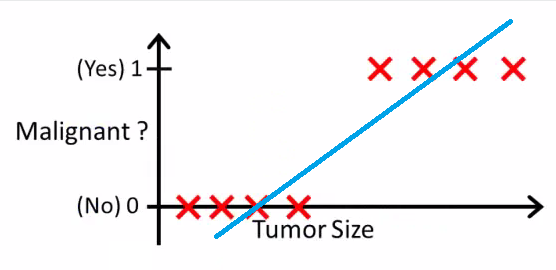

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/Logistics_1.png',width=600, height=400)

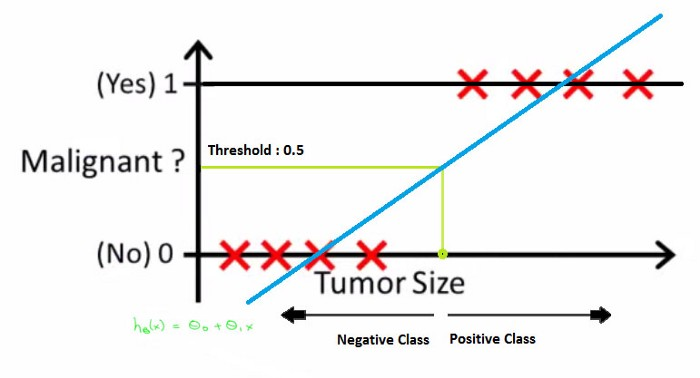

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/Logistics_2.jpeg',width=600, height=400)

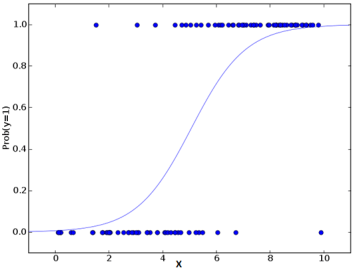

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/Logistics_5.png',width=800, height=400)

In [ ]:
model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
# Accuracy Score
model.score(X_test,y_test)

0.951875

In [ ]:
# Prediction 
value = "Is your boyfriend cheating on you?"
input_vector = cv.transform([value])
print(model.predict(input_vector))

[1]


In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3127
           1       0.97      0.93      0.95      3273

    accuracy                           0.95      6400
   macro avg       0.95      0.95      0.95      6400
weighted avg       0.95      0.95      0.95      6400



In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[3039   88]
 [ 220 3053]]


#### Random Forest

Reference: https://towardsdatascience.com/understanding-random-forest-58381e0602d2 

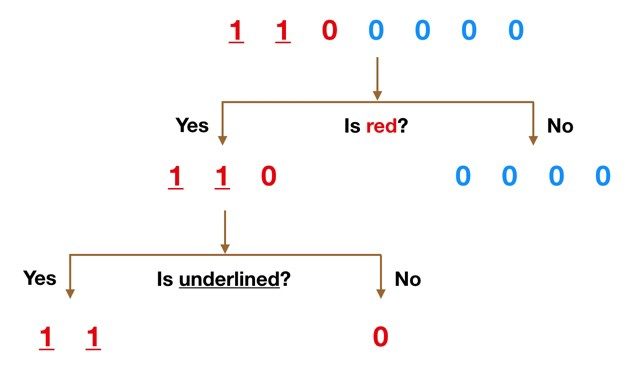

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/RF1.jpeg',width=800, height=400)

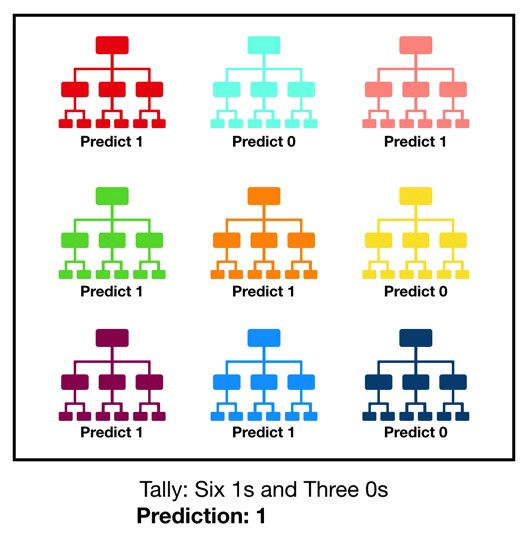

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/RF2.jpeg',width=800, height=400)

In [ ]:
model = RandomForestClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
# Accurracy Score
model.score(X_test,y_test)

0.9171875

In [ ]:
# Predictions 
value = "Is your boyfriend cheating on you?"
input_vector = cv.transform([value])
print(model.predict(input_vector))

[1]


In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3127
           1       0.89      0.96      0.92      3273

    accuracy                           0.92      6400
   macro avg       0.92      0.92      0.92      6400
weighted avg       0.92      0.92      0.92      6400



In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[2744  383]
 [ 147 3126]]


#### Support Vector Machine

Reference: https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

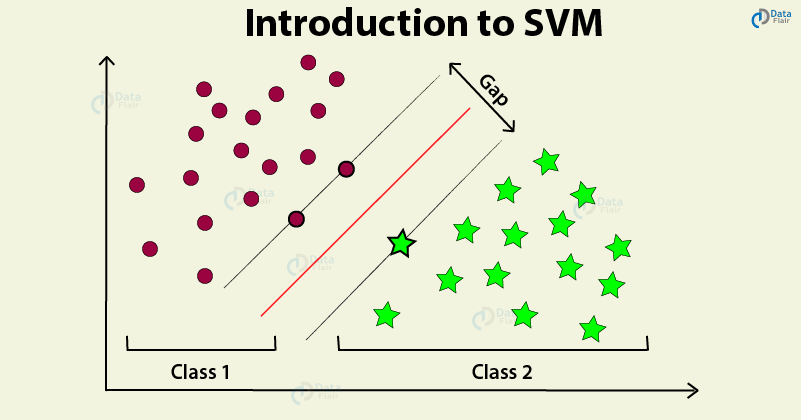

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/SVM.png',width=800, height=400)

In [ ]:
model = svm.SVC(kernel="linear")

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
# Accurracy Score
model.score(X_test,y_test)

0.9578125

In [ ]:
# Predictions 
value = "Is your boyfriend cheating on you?"
input_vector = cv.transform([value])
print(model.predict(input_vector))

[1]


In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3127
           1       0.97      0.95      0.96      3273

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400



In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[3029   98]
 [ 172 3101]]


#### Naive Bayes

Reference: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-

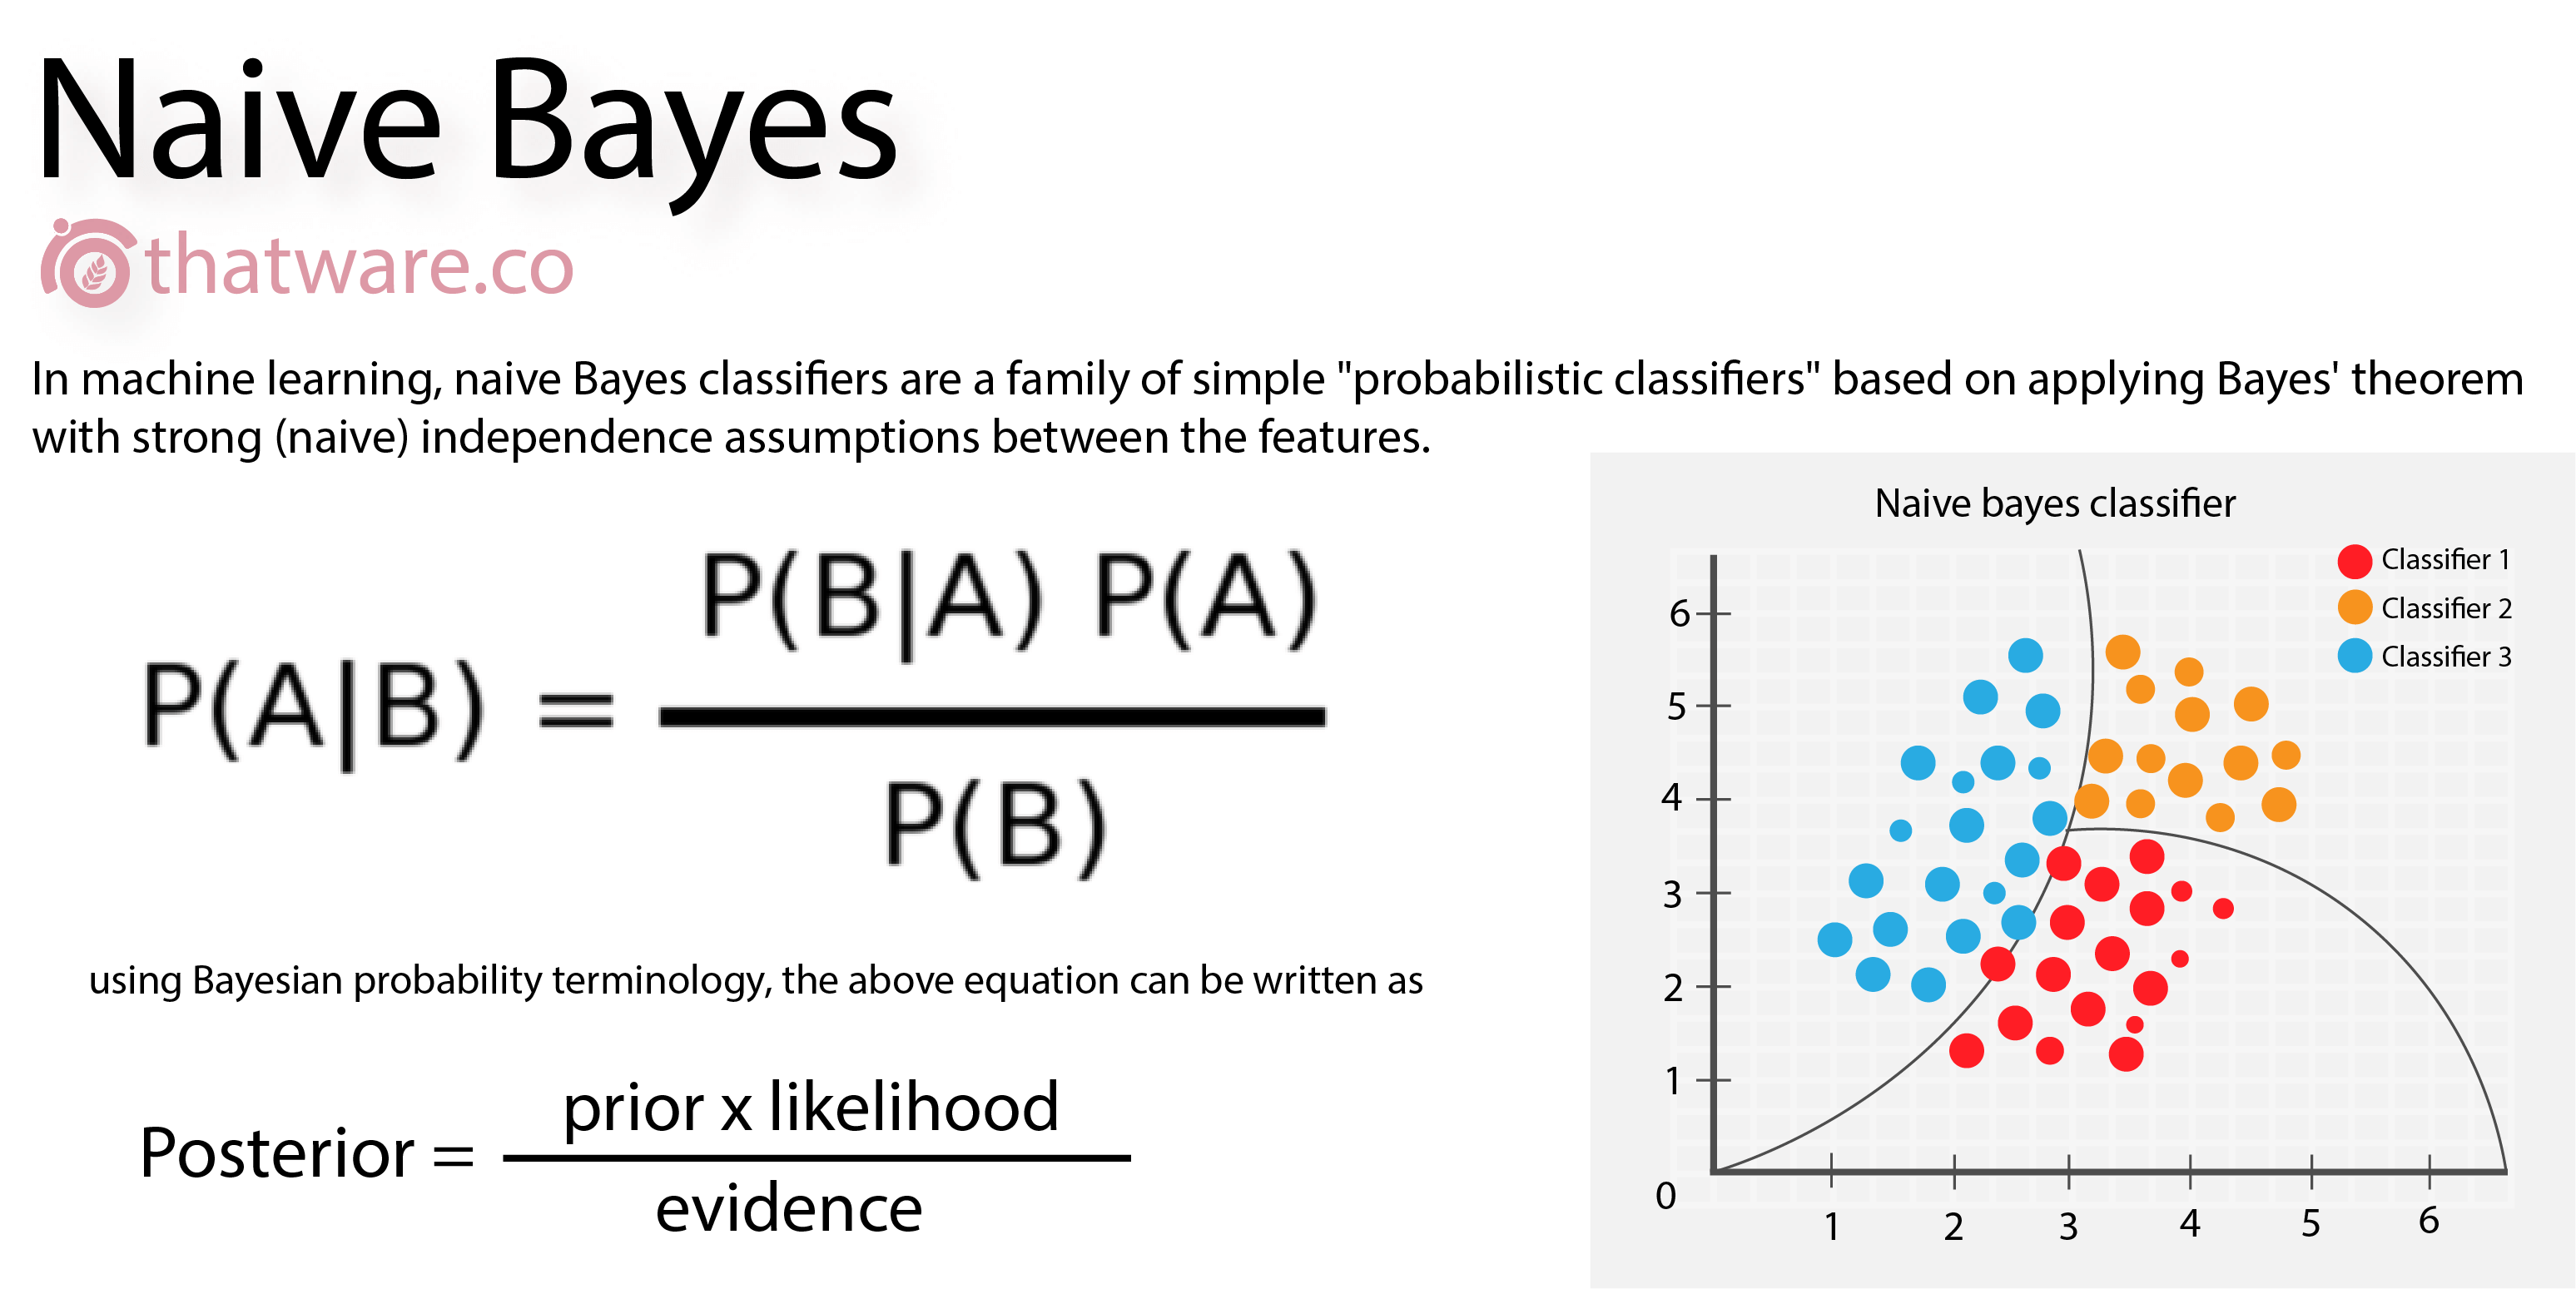

In [ ]:
Image('/content/drive/My Drive/Colab Notebooks/NB.png',width=800, height=400)

In [ ]:
model = MultinomialNB()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
# Accurracy Score
model.score(X_test,y_test)

0.96

In [ ]:
# Predictions 
value = "Is your boyfriend cheating on you?"
input_vector = cv.transform([value])
print(model.predict(input_vector))

[1]


In [ ]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3127
           1       0.96      0.96      0.96      3273

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400



In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[2986  141]
 [ 115 3158]]


#### Accuraccy Report: Clickbait Classification

1. Logistic Regression: 95.18% ~ 95%
2. Random Forest Classifier: 91.89% ~ 92%
3. Support Vector Machine: 95.78% ~ 96%
4. Naive Bayes:  96.00% ~ 96%

#### References

  1. What is Machine Learning and Types?
https://medium.com/towards-artificial-intelligence/what-is-machine-learning-ml-b58162f97ec7

  2. What is Supervised Learning?
https://towardsdatascience.com/what-are-the-types-of-machine-learning-e2b9e5d1756f (Only Supervised Learning Section)

  3. What is Classification and Type of Classification(Specifically Binary Classification)?
https://machinelearningmastery.com/types-of-classification-in-machine-learning/ (Only Binary Classification)

  4. What is Structured and Unstructred Data?
https://monkeylearn.com/blog/structured-data-vs-unstructured-data/ (Structured and Unstrctured is important)

  5. What is Natural Langauge Processing?
https://machinelearningmastery.com/natural-language-processing/

  6. What is Sentiment Analysis? (Optional)

  7. What is Data Preprocessing/Data Cleaning?
https://towardsdatascience.com/text-cleaning-methods-for-natural-language-processing-f2fc1796e8c7 (Open in Incognito Mode)

  8. What is Tokenization?
https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/

  9. What is Stemming?
https://www.geeksforgeeks.org/introduction-to-stemming/

  10. What is Lemmatization?
https://www.analyticssteps.com/blogs/what-stemming-and-lemmatization-nlp

  11. Difference between Stemming and Lemmatization?
https://www.analyticssteps.com/blogs/what-stemming-and-lemmatization-nlp

  12. What is Stop words and removal?
https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

  13. What is Vectorization? What is Count Vectorizer and TFIDF Vectorizer and Difference between Count Vectorizer and TFIDF Vectorizer?
https://towardsdatascience.com/understanding-nlp-word-embeddings-text-vectorization-1a23744f7223#:~:text=Word%20Embeddings%20or%20Word%20vectorization,into%20numbers%20are%20called%20Vectorization. (Only Vectorization)
    1. Count Vectorizer
https://medium.com/@joshsungasong/natural-language-processing-count-vectorization-and-term-frequency-inverse-document-frequency-49d2156552c1
    2. TFIDF Vectorizer
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76 (Incognito Term Frequency and Inverse Data Frequency)

  14. Intitution and Basic Understanding
	  1. Logistic Regression
	https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102
	Sigmoid Activation: https://ml-	cheatsheet.readthedocs.io/en/latest/logistic_regression.html#:~:text=Unlike%20linear%20regression		%20which%20outputs,two%20or%20more%20discrete%20classes.
	2. Random Forest
	https://towardsdatascience.com/understanding-random-forest-58381e0602d2 (Incognito)
	3. Support Vector Machine
	https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
	4. Naive Bayes
	https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

  15. Evaluation of Model
	  1. Accuracy Score
	  2. Classification Report
	  3. Confusion Matrix
https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234#:~:text=Classification%20Accuracy,-Classification%20Accur&text=It%20is%20the%20ratio%20of,samples%20belonging%20to%20each%20class.&text=Then%20our%20model%20can%20easily,sample%20belonging%20to%20class%20A.

